# Aproksymacja funkcji nieliniowej za pomocą funkcji liniowej
## Uczenie on-line

In [ ]:
# Pakiety
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Funkcja dopasowująca model regresji liniowej metodą minimalizacji gradientu

In [ ]:
def loss_function(data_matrix, a, b):
    return np.mean((data_matrix[:,1] - a*data_matrix[:,0] - b)**2)

def gradient(data_matrix, a, b):
    d_a = -2*np.mean(data_matrix[:,0]*(data_matrix[:,1] - a*data_matrix[:,0] - b))
    d_b = -2*np.mean((data_matrix[:,1] - a*data_matrix[:,0] - b))
    return d_a, d_b

def fit_model(data_matrix,
              learning_rate = 0.001,
              iterations = 10,
              a = 0,
              b = 0):

    for i in range(iterations):
        gradients = gradient(data_matrix, a, b)
        a = a - learning_rate * gradients[0]
        b = b - learning_rate * gradients[1]

    return a, b

### Idealne dane

In [ ]:
Args = np.arange(0, 15, 0.1)
dataset1 = np.array([Args, np.sin(Args)]).T

### Dane z błędem losowym

In [ ]:
dataset2 = np.array([Args, np.sin(Args) + np.random.normal(0, 0.5, size = len(Args))]).T

### Wizualizacja danych

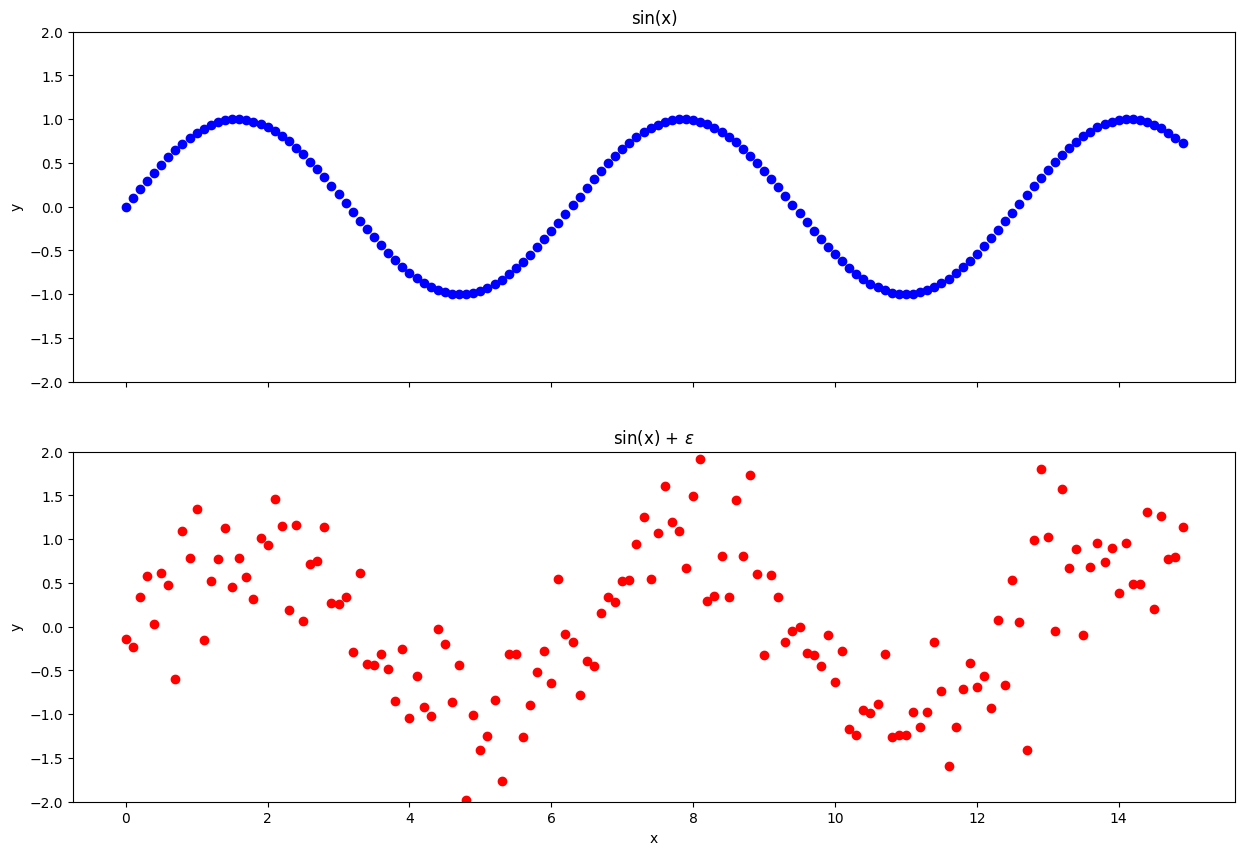

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].scatter(dataset1[:,0], dataset1[:,1], label="Idealne dane", color='b')
axes[0].set_title("sin(x)")
axes[0].set_xlabel("")
axes[0].set_ylabel("y")
axes[0].set_xticklabels([])
axes[0].set_ylim(-2,2)

axes[1].scatter(dataset2[:,0], dataset2[:,1], label="Dane z błędem losowym", color='r')
axes[1].set_title(r"sin(x) + $\epsilon$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_ylim(-2,2)

plt.show()


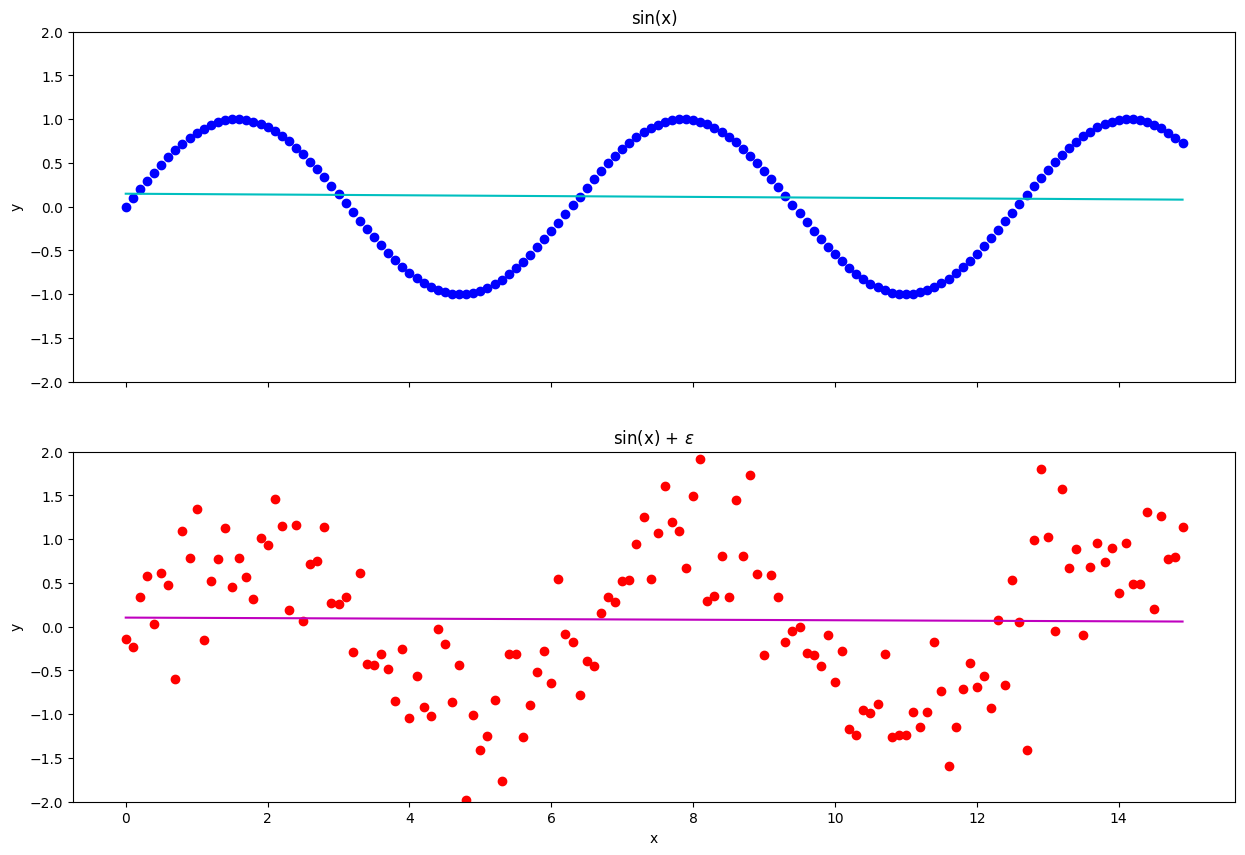

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

model1 = fit_model(dataset1, learning_rate = 0.001, iterations = 10000)

axes[0].scatter(dataset1[:,0], dataset1[:,1], label="Idealne dane", color='b')
axes[0].plot(dataset1[:,0], model1[0]*dataset1[:,0] + model1[1], label="model", color='c')
axes[0].set_title("sin(x)")
axes[0].set_xlabel("")
axes[0].set_ylabel("y")
axes[0].set_xticklabels([])
axes[0].set_ylim(-2,2)

model2 = fit_model(dataset2, learning_rate = 0.001, iterations = 10000)

axes[1].scatter(dataset2[:,0], dataset2[:,1], label="Dane z błędem losowym", color='r')
axes[1].plot(dataset2[:,0], model2[0]*dataset2[:,0] + model2[1], label="model", color='m')
axes[1].set_title(r"sin(x) + $\epsilon$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_ylim(-2,2)

plt.show()


  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

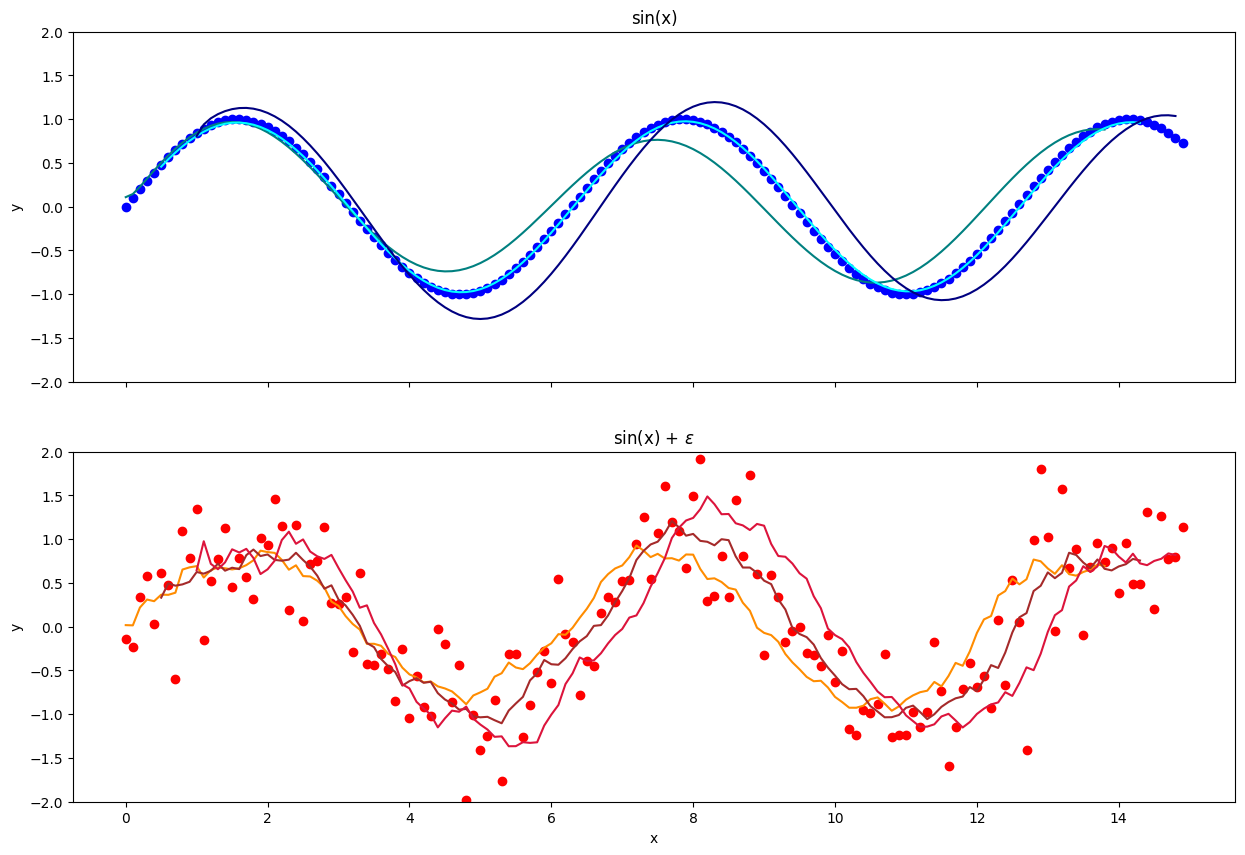

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

h = 10

lr = 0.001

iters = 100000

recon1_1 = pd.DataFrame({'X':[], 'Y':[]})
recon2_1 = pd.DataFrame({'X':[], 'Y':[]})
recon3_1 = pd.DataFrame({'X':[], 'Y':[]})

model1 = (0,0)

for i in tqdm(range(len(dataset1[:,0]) - h - 1)):
    model1 = fit_model(dataset1[i:(i+h),:], learning_rate = lr, iterations = iters, a = model1[0], b = model1[1])
    recon1_1.loc[len(recon1_1)] = [dataset1[i,0], model1[0]*dataset1[i,0] + model1[1]]
    recon2_1.loc[len(recon2_1)] = [dataset1[int(i+h/2),0], model1[0]*dataset1[int(i+h/2),0] + model1[1]]
    recon3_1.loc[len(recon3_1)] = [dataset1[i+h,0], model1[0]*dataset1[i+h,0] + model1[1]]

colors_blue_theme = ['teal', 'cyan', 'navy']

axes[0].scatter(dataset1[:,0], dataset1[:,1], label="Idealne dane", color='b')
axes[0].plot(recon1_1.X, recon1_1.Y, label="model", color=colors_blue_theme[0])
axes[0].plot(recon2_1.X, recon2_1.Y, label="model", color=colors_blue_theme[1])
axes[0].plot(recon3_1.X, recon3_1.Y, label="model", color=colors_blue_theme[2])
axes[0].set_title("sin(x)")
axes[0].set_xlabel("")
axes[0].set_ylabel("y")
axes[0].set_xticklabels([])
axes[0].set_ylim(-2,2)

recon1_2 = pd.DataFrame({'X':[], 'Y':[]})
recon2_2 = pd.DataFrame({'X':[], 'Y':[]})
recon3_2 = pd.DataFrame({'X':[], 'Y':[]})

model2 = (0,0)

for i in tqdm(range(len(dataset2[:,0]) - h - 1)):
    model2 = fit_model(dataset2[i:(i+h),:], learning_rate = lr, iterations = iters, a = model2[0], b = model2[1])
    recon1_2.loc[len(recon1_2)] = [dataset2[i,0], model2[0]*dataset2[i,0] + model2[1]]
    recon2_2.loc[len(recon2_2)] = [dataset2[int(i+h/2),0], model2[0]*dataset2[int(i+h/2),0] + model2[1]]
    recon3_2.loc[len(recon3_2)] = [dataset2[i+h,0], model2[0]*dataset2[i+h,0] + model2[1]]

colors_red_theme = ['darkorange', 'brown', 'crimson']

axes[1].scatter(dataset2[:,0], dataset2[:,1], label="Dane z błędem losowym", color='r')
axes[1].plot(recon1_2.X, recon1_2.Y, label="model", color=colors_red_theme[0])
axes[1].plot(recon2_2.X, recon2_2.Y, label="model", color=colors_red_theme[1])
axes[1].plot(recon3_2.X, recon3_2.Y, label="model", color=colors_red_theme[2])
axes[1].set_title(r"sin(x) + $\epsilon$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_ylim(-2,2)

plt.show()


In [ ]:
import matplotlib.animation as animation

# Tworzenie figury i osi (bez wyświetlania)
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Parametry modelu
h = 10
lr = 0.004
iters = 10000

# Inicjalizacja pustych DataFrame
recon2_1 = pd.DataFrame({'X': [], 'Y': []})
recon2_2 = pd.DataFrame({'X': [], 'Y': []})

# Kolory
colors_blue_theme = ['teal', 'cyan', 'navy']
colors_red_theme = ['darkorange', 'brown', 'crimson']

# Wykresy punktowe (dane)
scatter1 = axes[0].scatter(dataset1[:, 0], dataset1[:, 1], label="Idealne dane", color='b')
scatter2 = axes[1].scatter(dataset2[:, 0], dataset2[:, 1], label="Dane z błędem losowym", color='r')

# Linie dla modeli
line_recon1, = axes[0].plot([], [], color=colors_blue_theme[1], label="model (punktowy)")
line_full1, = axes[0].plot([], [], color=colors_blue_theme[1], label="model (ciągły)")

line_recon2, = axes[1].plot([], [], color=colors_red_theme[1], label="model (punktowy)")
line_full2, = axes[1].plot([], [], color=colors_red_theme[1], label="model (ciągły)")

# Szary obszar (inicjalizacja)
gray_rect1 = axes[0].axvspan(0, 0, color='gray', alpha=0.3)
gray_rect2 = axes[1].axvspan(0, 0, color='gray', alpha=0.3)

# Ustawienia wykresów
axes[0].set_title("sin(x)")
axes[0].set_ylabel("y")
axes[0].set_xticklabels([])
axes[0].set_ylim(-2, 2)

axes[1].set_title(r"sin(x) + $\epsilon$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_ylim(-2, 2)

# Pasek postępu
progress_bar = tqdm(total=len(dataset1[:, 0]) - h - 1, desc="Tworzenie animacji")

# Funkcja aktualizująca animację
def update(i):
    global recon2_1, recon2_2, gray_rect1, gray_rect2, iters

    if i + h >= len(dataset1):
        return

    if i % 10 == 0 and i > 0:
        iters = int(iters * 1.3)

    # Model 1 (idealne dane)
    model1 = fit_model(dataset1[i:(i+h), :], learning_rate=lr, iterations=iters)

    # Punktowy model (recon2_1)
    recon2_1 = pd.concat([recon2_1, pd.DataFrame({'X': [dataset1[int(i+h/2), 0]],
                                                  'Y': [model1[0]*dataset1[int(i+h/2), 0] + model1[1]]} )],
                         ignore_index=True)

    # Aktualizacja linii dla modelu 1
    line_recon1.set_data(recon2_1.X, recon2_1.Y)
    line_full1.set_data(dataset1[:, 0], model1[0] * dataset1[:, 0] + model1[1])

    # Model 2 (dane z błędem losowym)
    model2 = fit_model(dataset2[i:(i+h), :], learning_rate=lr, iterations=iters)

    # Punktowy model (recon2_2)
    recon2_2 = pd.concat([recon2_2, pd.DataFrame({'X': [dataset2[int(i+h/2), 0]],
                                                  'Y': [model2[0]*dataset2[int(i+h/2), 0] + model2[1]]} )],
                         ignore_index=True)

    # Aktualizacja linii dla modelu 2
    line_recon2.set_data(recon2_2.X, recon2_2.Y)
    line_full2.set_data(dataset2[:, 0], model2[0] * dataset2[:, 0] + model2[1])

    # Aktualizacja szarego obszaru (usunięcie starego i dodanie nowego)
    gray_rect1.remove()
    gray_rect1 = axes[0].axvspan(dataset1[i, 0], dataset1[i+h, 0], color='gray', alpha=0.3)

    gray_rect2.remove()
    gray_rect2 = axes[1].axvspan(dataset2[i, 0], dataset2[i+h, 0], color='gray', alpha=0.3)

    # Aktualizacja paska postępu
    progress_bar.update(1)

    return line_recon1, line_full1, line_recon2, line_full2, gray_rect1, gray_rect2

# Tworzenie animacji (bez wyświetlania, z paskiem postępu)
ani = animation.FuncAnimation(fig, update, frames=len(dataset1[:, 0]) - h - 1, interval=50, blit=False)

# Zapis do pliku GIF
ani.save("animacja.gif", writer=animation.PillowWriter(fps=20))

# Zamknięcie paska postępu
progress_bar.close()

# Zamknięcie figury, aby nie była wyświetlana
plt.close(fig)


Tworzenie animacji:   0%|          | 0/139 [00:00<?, ?it/s]

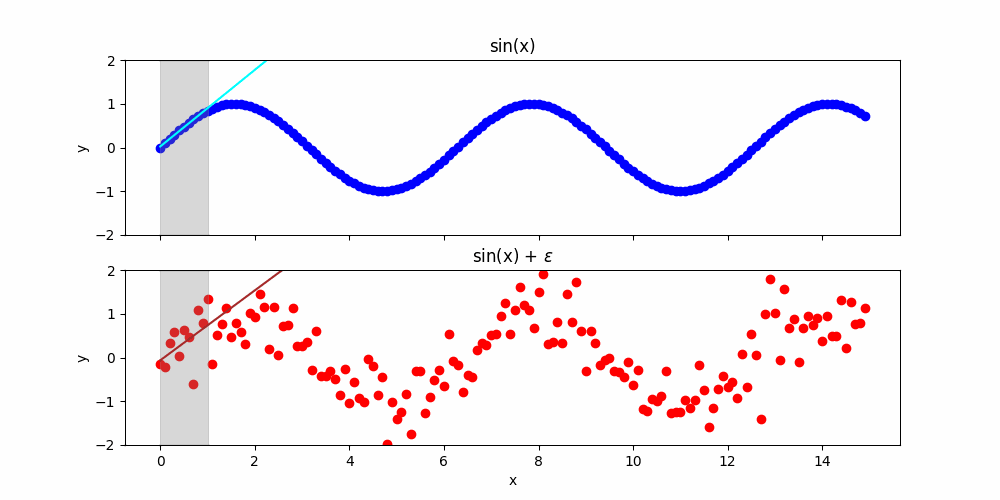

In [ ]:
from IPython.display import display, Image
display(Image(filename="animacja.gif"))

## Zadania

**Zadanie 1.**

Proszę stworzyć, a następnie zwizualizować dane przedstawiające:
1. obserwacje wybranej funkcji nieliniowej;
2. obserwacje funkcji z punktu pierwszego obarczone błędem losowym.

**Zadanie 2.**

Proszę dopasować model liniowy do całych zbiorów danych z zadania 1.

**Zadanie 3.**

Proszę zaimplementować metodę minimalizacji gradientu.

W kolejnych zadaniach proszę wykorzystywać właśnie tę funkcję.

**Zadanie 4.**

Proszę zaimplementować uczenie on-line do danych z zadania 1. Proszę rozważyć trzy przypadki:
1. predykcja na początku okna;
2. predykcja na środku okna;
3. predykcja na końcu okna.

## Propozycja projektu

Proszę zaprezentować rozwiązania powyższych zadań oraz:
1. wyjaśnić działanie algorytmu minimalizacji gradientu;
2. wyjaśnić różnicę pomiędzy uczeniem on-line i off-line;
3. wyjaśnić dlaczego uczenie modelu staje się trudniejsze wraz ze wzrostem argumentów.

W punktach 1 i 3 proszę powołać się na fakty analityczne i algebraiczne (tzn. proszę "rozpisać wzory").  